In [1]:
import numpy as np
import pandas as pd
import itertools
import pickle
import sys
import os
import dsc
from dsc.query_engine import Query_Processor as dscQP
from dsc import dsc_io

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils

mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)

from scipy.spatial import procrustes

In [73]:
with open(os.path.expanduser(db), 'rb') as f:
    data = pickle.load(f)

In [78]:
data.keys()

odict_keys(['blockdiag', 'identical', 'truncated_svd', 'score', 'rpca', 'nnm', 'nnm_sparse', 'blockdiag_p', 'blockdiag_k', 'blockdiag_h2', 'blockdiag_h2shared', 'blockdiag_aq', 'factorgo', '.html', '.groups', '.depends', '.output', '.pipelines'])

In [80]:
data['.groups']

{'simulate': ['blockdiag',
  'blockdiag_p',
  'blockdiag_k',
  'blockdiag_h2',
  'blockdiag_h2shared',
  'blockdiag_aq'],
 'lowrankfit': ['rpca', 'nnm', 'nnm_sparse', 'identical']}

In [88]:
dsc_output = "/gpfs/commons/groups/knowles_lab/sbanerjee/low_rank_matrix_approximation_numerical_experiments/lrma_single"

dsc_fname  = os.path.basename(os.path.normpath(dsc_output))
db = os.path.join(dsc_output, dsc_fname + ".db")
respkl   = os.path.join("../dsc/results", dsc_fname + ".pkl")
dscoutpkl = os.path.join("../dsc/results", dsc_fname + "_dscout.pkl")

if os.path.isfile(dscoutpkl):
    dscout = pd.read_pickle(dscoutpkl)
else:
    print ("Could not find dscout from dscquery")

refresh_pickle = True
sim_module = "simulate"
target = [sim_module] + \
            [f"{sim_module}.{prop}" for prop in ["p", "k", "h2", "h2_shared_frac", "aq", "a0"]] + \
            ["lowrankfit", "matfactor"] + \
            [f"score.{x}" for x in ["L_rmse", "F_rmse"]]

condition = [""]
groups = ['matfactor: truncated_svd, factorgo']

print ("Reading from DSC database:")
print (f"    {db}")
print ("")

qp = dscQP(db, target, condition, groups = groups)
df = qp.output_table

df

Could not find dscout from dscquery
Reading from DSC database:
    /gpfs/commons/groups/knowles_lab/sbanerjee/low_rank_matrix_approximation_numerical_experiments/lrma_single/lrma_single.db



,DSC,simulate,simulate.p,simulate.output.file,simulate.k,simulate.h2_shared_frac,simulate.h2,simulate.aq,simulate.a0,lowrankfit,lowrankfit.output.file,matfactor,matfactor.output.file,score.L_rmse:output,score.F_rmse:output
0,1,blockdiag,1000.0,blockdiag/blockdiag_1,100.0,0.6,0.6,0.6,0.2,identical,identical/blockdiag_1_identical_1,truncated_svd,truncated_svd/blockdiag_1_identical_1_truncate...,score/blockdiag_1_identical_1_truncated_svd_1_...,score/blockdiag_1_identical_1_truncated_svd_1_...
1,1,blockdiag,1000.0,blockdiag/blockdiag_1,100.0,0.6,0.6,0.6,0.2,rpca,rpca/blockdiag_1_rpca_1,truncated_svd,truncated_svd/blockdiag_1_rpca_1_truncated_svd_1,score/blockdiag_1_rpca_1_truncated_svd_1_score_1,score/blockdiag_1_rpca_1_truncated_svd_1_score_1
2,1,blockdiag,1000.0,blockdiag/blockdiag_1,100.0,0.6,0.6,0.6,0.2,nnm,nnm/blockdiag_1_nnm_1,truncated_svd,truncated_svd/blockdiag_1_nnm_1_truncated_svd_1,score/blockdiag_1_nnm_1_truncated_svd_1_score_1,score/blockdiag_1_nnm_1_truncated_svd_1_score_1
3,1,blockdiag,1000.0,blockdiag/blockdiag_1,100.0,0.6,0.6,0.6,0.2,nnm_sparse,nnm_sparse/blockdiag_1_nnm_sparse_1,truncated_svd,truncated_svd/blockdiag_1_nnm_sparse_1_truncat...,score/blockdiag_1_nnm_sparse_1_truncated_svd_1...,score/blockdiag_1_nnm_sparse_1_truncated_svd_1...
4,1,blockdiag_p,500.0,blockdiag_p/blockdiag_p_1,100.0,0.6,0.6,0.6,0.2,identical,identical/blockdiag_p_1_identical_1,truncated_svd,truncated_svd/blockdiag_p_1_identical_1_trunca...,score/blockdiag_p_1_identical_1_truncated_svd_...,score/blockdiag_p_1_identical_1_truncated_svd_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,blockdiag_h2shared,1000.0,blockdiag_h2shared/blockdiag_h2shared_3,100.0,0.8,0.6,0.6,0.2,identical,identical/blockdiag_h2shared_3_identical_1,factorgo,factorgo/blockdiag_h2shared_3_identical_1_fact...,score/blockdiag_h2shared_3_identical_1_factorg...,score/blockdiag_h2shared_3_identical_1_factorg...
71,1,blockdiag_h2shared,1000.0,blockdiag_h2shared/blockdiag_h2shared_4,100.0,1.0,0.6,0.6,0.2,identical,identical/blockdiag_h2shared_4_identical_1,factorgo,factorgo/blockdiag_h2shared_4_identical_1_fact...,score/blockdiag_h2shared_4_identical_1_factorg...,score/blockdiag_h2shared_4_identical_1_factorg...
72,1,blockdiag_aq,1000.0,blockdiag_aq/blockdiag_aq_1,100.0,0.6,0.6,0.2,0.2,identical,identical/blockdiag_aq_1_identical_1,factorgo,factorgo/blockdiag_aq_1_identical_1_factorgo_1,score/blockdiag_aq_1_identical_1_factorgo_1_sc...,score/blockdiag_aq_1_identical_1_factorgo_1_sc...
73,1,blockdiag_aq,1000.0,blockdiag_aq/blockdiag_aq_2,100.0,0.6,0.6,0.4,0.2,identical,identical/blockdiag_aq_2_identical_1,factorgo,factorgo/blockdiag_aq_2_identical_1_factorgo_1,score/blockdiag_aq_2_identical_1_factorgo_1_sc...,score/blockdiag_aq_2_identical_1_factorgo_1_sc...


In [39]:
df.iloc[[12]]

,DSC,blockdiag_k.output.file,blockdiag_k.p,blockdiag_k.k,blockdiag_k.h2,blockdiag_k.h2_shared_frac,blockdiag_k.aq,blockdiag_k.a0,lowrankfit,lowrankfit.output.file,truncated_svd.output.file
12,1,blockdiag_k/blockdiag_k_1,1000.0,10.0,0.6,0.6,0.6,0.2,identical,identical/blockdiag_k_1_identical_1,truncated_svd/blockdiag_k_1_identical_1_trunca...


In [51]:
sim_fprefix = df.iloc[[15]][f'{sim_module}.output.file'].values[0]
sim_fname = os.path.join(dsc_output, f"{sim_fprefix}.pkl")
sim_data  = dsc_io.load_dsc(sim_fname)

res_fprefix = df.iloc[[15]][f'truncated_svd.output.file'].values[0]
res_fname = os.path.join(dsc_output, f"{res_fprefix}.pkl")
res_data  = dsc_io.load_dsc(res_fname)

In [67]:
def get_mse(original, recovered, mask = None):
    if mask is None: mask = np.ones_like(original)
    n = np.sum(mask)
    mse = np.sum(np.square((original - recovered) * mask)) / n 
    return mse

def get_psnr(original, recovered, mask = None):
    if mask is None: mask = np.ones_like(original)
    omax = np.max(original[mask == 1]) 
    omin = np.min(original[mask == 1]) 
    maxsig2 = np.square(omax - omin)
    mse = get_mse(original, recovered, mask)
    res = 10 * np.log10(maxsig2 / mse)
    return res

def matrix_dissimilarity_scores(original, recovered, mask = None):
    '''
    Procrustes analysis returns the square of the Frobenius norm.
    Use the rotated matrix to obtain the peak signal-to-noise ratio (PSNR).
    '''
    k = min(original.shape[1], recovered.shape[1])
    R_orig, R_recv, m2 = procrustes(original[:, 0:k], recovered[:, 0:k])
    psnr = get_psnr(R_orig, R_recv, mask)
    return np.sqrt(m2), psnr

def get_adjusted_MI_score(X, class_labels):
    X_cent = X - np.mean(X, axis = 0, keepdims = True)
    distance_matrix = skmetrics.pairwise.pairwise_distances(X_cent, metric='euclidean')
    model = AgglomerativeClustering(n_clusters = 3, linkage = 'average', metric = 'precomputed')
    class_pred = model.fit_predict(distance_matrix)
    return skmetrics.adjusted_mutual_info_score(class_labels, class_pred)

def comparison_metrics(Ltrue, Ftrue, L, F, labels, mask = None):
    L_rmse, L_psnr = matrix_dissimilarity_scores(Ltrue, L)
    F_rmse, F_psnr = matrix_dissimilarity_scores(Ftrue, F)
    Z_rmse, Z_psnr = matrix_dissimilarity_scores(Ltrue @ Ftrue.T, L @ F.T, mask)
    adj_MI = get_adjusted_MI_score(L, labels)
    return L_rmse, F_rmse, Z_rmse, L_psnr, F_psnr, Z_psnr, adj_MI

In [68]:
comparison_metrics(sim_data['Ltrue'], sim_data['Ftrue'], res_data['L_est'], res_data['F_est'], np.array(sim_data['Ctrue']))

(0.0792635003270949,
 0.4276003332981411,
 0.4344490835425933,
 40.30721065004967,
 25.02808872600379,
 29.75603934051066,
 0.8140516786680418)

In [64]:
distance_matrix = skmetrics.pairwise.pairwise_distances(Lest, metric='euclidean')

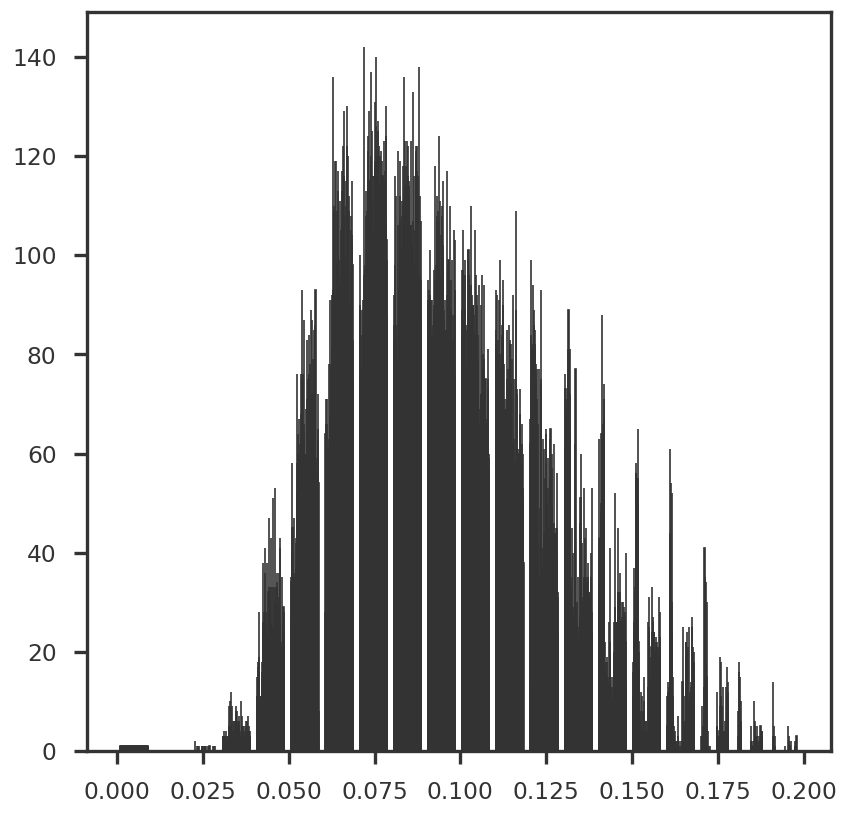

In [66]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.hist(distance_matrix)
plt.show()

In [53]:
Ltrue = sim_data['Ltrue']
Lest = res_data['L_est']
psnr, err = matrix_dissimilarity_scores(Ltrue, Lest)
print (psnr, err)

40.30721065004967 0.0792635003270949


In [54]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics as skmetrics

def get_adjusted_MI_score(X, class_labels):
    X_cent = X - np.mean(X, axis = 0, keepdims = True)
    distance_matrix = skmetrics.pairwise.pairwise_distances(X_cent, metric='euclidean')
    model = AgglomerativeClustering(n_clusters = 4, linkage = 'average', metric = 'precomputed')
    class_pred = model.fit_predict(distance_matrix)
    return skmetrics.adjusted_mutual_info_score(class_labels, class_pred)

In [55]:
labels = np.array(sim_data['Ctrue'])
get_adjusted_MI_score(Ltrue, labels)

0.5682972582563437

In [56]:
get_adjusted_MI_score(Lest, labels)

0.8173921812480417